[View in Colaboratory](https://colab.research.google.com/github/msnaru/PRML/blob/master/scr/PRML2_2_1.ipynb)

# ディリクレ分布
多項分布$ \left(
    \begin{array}{c}
      N\\
     m_1m_2\ldots m_k
    \end{array}
  \right)  \mu_k^{m_k}$のパラメータ$\mu_k$に対する事前分布は共役分布として以下のように表現出来る。

\begin{equation*}
p(\boldsymbol{\mu} | \boldsymbol{\alpha}) \varpropto \prod_{k = 1}^K \mu_k^{\alpha_k-1}
\end{equation*}

ただし$\Sigma_k\mu_k=1$である。


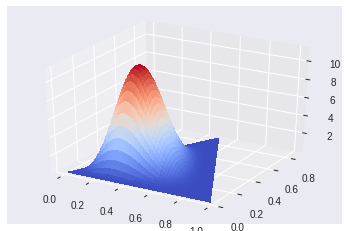

In [3]:
# http://ynomura.dip.jp/archives/2018/03/post_66.html より

%matplotlib inline
import numpy as np
from scipy.stats import dirichlet
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# triangle mesh grid (0,0)-(1,0)-(0,1)
xx = np.array([[0.01*a*0.01*(100-b) for a in range(1, 100)] for b in range(1, 100)])
yy = np.array([[0.01*b] * 99 for b in range(1, 100)])

# Dirichlet PDF on mesh grid ((0,0)->(0,0,1), (1,0)->(1,0,0), (0,1)->(0,1,0))
a, b, c = (2, 3, 5)
di = dirichlet([a+1, b+1, c+1])
Z = di.pdf([xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# transform isosceles right triangle mesh into equilateral triangle
xx2 = np.array([x + (0.5 - np.average(x)) for x in xx])
yy2 = yy * np.sqrt(3) / 2

# 3D plot
ax.plot_surface(xx2, yy2, Z, cmap=cm.coolwarm, antialiased=False)
plt.show()